# Introduction

In [1]:
%matplotlib inline
from algo_evaluation.mdp.core import *
from algo_evaluation.mdp import core
reload(core)

<module 'algo_evaluation.mdp.core' from '/Users/maestro/schoolspace/bag-of-algorithms/algo_evaluation/mdp/core.pyc'>

## Value and Policy Iteration

### Forest Management

 In "Application of stochastic dynamic programming to optimal fire management of a spatially structured threatened species", Possingham provided a theoretical framework for threated speacies fire management. Problem can be modelled by Markov Decision Process and it is simple enough to be able to understand the optimal policy learning process.

__Fire Management Model__

   - __States__: the age of the threaned species (youngest is 1; experiments performed on various age limits)
   - __Actions__: `Wait` (0) and `Cut` (1)
   - __p__: the probability of wild fire occurence (various ranges used in the experiments)
   - __Rewards__: when the forest is in its oldest state and action 'Wait' is performed, rewards is 4; when the forest is in its oldest state and action 'Cut' is performed, reward is 2

__Value Iteration vs Policy Iteration__

   Both algorithms, Value and Policy Iteration converged to the __same__ optimal policy, however the latter converged much faster (less iterations required). 
   Value Iteration algorithm solves MDP by iterating through utilities of each state while Policy Iteration alternates between calculating the utilities of states and improving current policy with respect to current utilities.

In [2]:
df = forest_mdp.solve_forest_example()

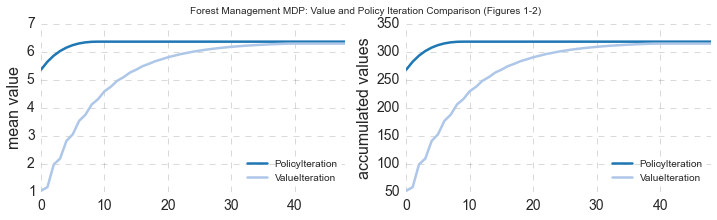

In [325]:
forest_mdp.plot_values(df)

#### Factors affecting the convergence rate


- __Age of the forest__ (number of MDP states )

    Agent is rewarded with higher values if old forest is preserved and it is evident from the optimal policy choice (see Figure 6). Agent is accumulating more rewards by selecting `wait` action more prominently for forest with age 100 as compared to young forest of 5 years.
    According to the current model, accumulation is more rapid for the age below 10, after which ... 


- __Discount factor__

    Discount factor is affecting how much of future reward is considered relevant. For discount factors close to 1.0, there is no limit on how much reward can be accumulated (see red curve in Figure 7) which is known as infinite horizon and agent will never terminate. Good trade-off is achieved for discount factor equal to 0.9, where accumulation of reward is saturated with relatively small number of iterations.


- __Probability of fire__

    Another important factor to consider is probability of fire which influences the agent's decision to wait or cut the forest. If probability of fire is very small, then it makes sense to preserve the forest, however when the chance of loosing the whole forest in the fire grows, agent is forced to select `Cut` action. In this case, forest can be at least used as a resource (See Figure 8). In the real world probability of fire will be affected by geografical location and weather conditions. In the current model since we do not have additional factors, it makes sense to set probability of fire to 0.5.

   Note: it is sufficient to analyze the convergence factors for one of the methods (here ValueIteration is chosen since it took longer to converge and thus the effect is more prominent). Additional advantage of choose ValueIteration over PolicyIteration is algorithm runtime, where former is significantly faster (see Figure 5)

In [332]:
df_age = solve_mdp.test_forest_age()
df_discount = solve_mdp.test_discount_factor()
df_fire_prob = solve_mdp.test_fire_probability()

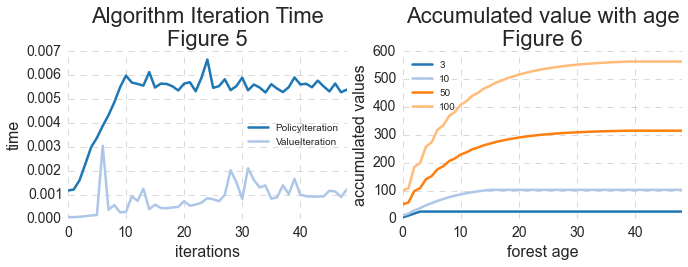

In [333]:
solve_mdp.plot_time_and_states(df, df_age)

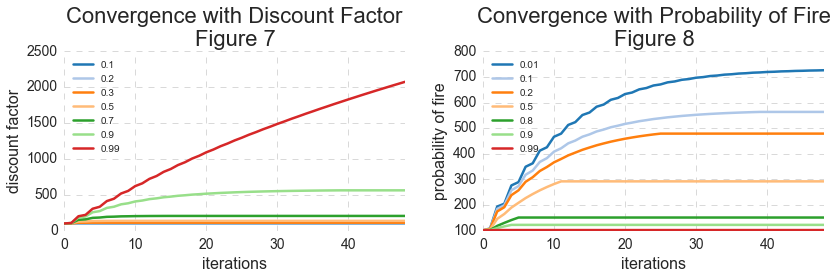

In [334]:
solve_mdp.plot_discount_factor_and_fire_probability(df_discount, df_fire_prob)

### Click Through Rate (CTR)

   In contrast to the MDP of the fire management where we defined multiple states (forest age) and only two actions (wait or cut), we will define another MDP, where we will have multiple actions and only a single state. This class of markovian processes have a special name - Multiarmed Bandit and are very useful in ad tech business.

__CTR Model__

   - __states__ - there is only one assumed state in this process.

   - __actions__ - each unique ad is represented by an action (an arm in Multiarmed Bandit jargon);
    when user visits the site, one ad will be selected to show according to the learned policy.

    For example, we might have a collection of ads `[AutoAd, EntertainmentAd, ShoppingAd, FoodAd,..]` and the learning agent decides which one to show to achieve the best performance metric overall (in the case CTR).

   - __rewards__ - each time user is shown an ad, there is a probability that he will click on it.
    Every time when click is registered, we accumulate reward of 1 unit and 0 otherwise.

    For the purpose of evaluating various algorithms, we will simulate user behavior using __Monte Carlo__ framework - applying random number generator to simulate what might happen in real-time scenarios.

__Click Simulator__

- let's assume we have 20 ads to select from
- let's model the probability of ad resulting in user click by __Poisson__ distribution (Fig 2.1);

    In other words, there will be very few ads resulting in either high or low _clickability_ while the majority of ads will will fall under 50/50 chance.


- let's define rewards by simulating user's behavior with __Bernoulli__ process:
    * reward=1 - user clicks on the ad
    * reward=0 - user ignores the ad
    
  In the example below (Fig 2.2), where each ad was shown once, users `clicked` on 60% of ads.
  
__Optimization goal__:

   The agent is learning the sequence of ads to show that maximize the objective goal: in this case - click through rate. So, we redefine rewards, by counting how many users clicked on ad out of total users to which ad was shown.

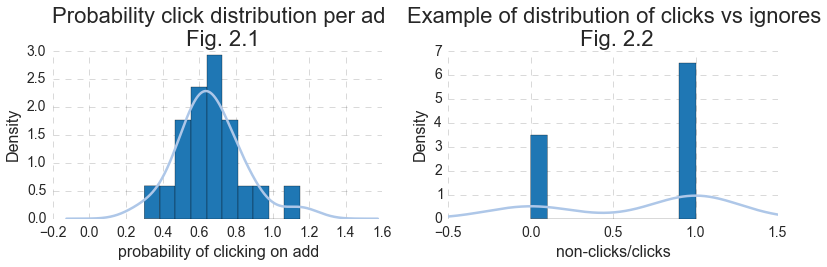

In [337]:
click_model = ctr_mdp.simulate_user_click(mu=14, n_ads=20.0)

Modeling the process as defined above (where rewards and transition probabilities are known), demonstrates the simplicity of the solution by Value and Policy Iteration. Since we only have one state, the only thing that policy needs to learn is which ad to show next - the one which has the highest CTR is chosen. Again, both algorithms give the same answer.

Convergence of the Policy Iteration is instanteneous (as shown in average and accumulate values in Fig. 2.3-2.4). This also gives great clocktime advantage (see Fig 2.5) while ValueIteration time is growing linearly with number of iterations.

In [338]:
ctr_df = ctr_mdp.solve_ctr_mdp()

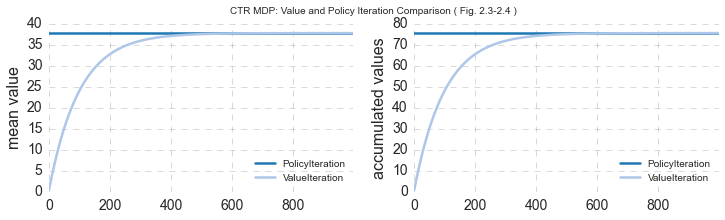

In [342]:
ctr_mdp.plot_values(ctr_df)

Convergence of the Value Iteration algorithm due to discount factor variability demonstrates similar behavior as in Fire Management MDP: if we are considering only immidiate rewards, accumulation will stop after only few iterations.

In [340]:
df_ctr_discount = ctr_mdp.test_discount_factor()

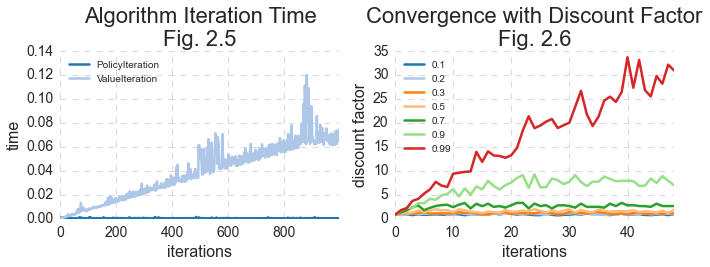

In [341]:
ctr_mdp.plot_time_and_discount(ctr_df, df_ctr_discount)

## Q Learning

In [2]:
ql = forest_mdp.test_qlearning_algorithm()

In [7]:
ql.policy

(0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0)

In [335]:
reload(core)

<module 'algo_evaluation.mdp.core' from '/Users/maestro/schoolspace/bag-of-algorithms/algo_evaluation/mdp/core.pyc'>

# References

- Possingham H & Tuck G, 1997, ‘Application of stochastic dynamic programming to optimal fire management of a spatially structured threatened species’, *MODSIM 1997*, vol. 2, pp. 813–817. `Available online http://www.mssanz.org.au/MODSIM97/Vol%202/Possingham.pdf`

- John Myles White, 2012, `Bandit Algorithms for Website Optimization: Developing, Deploying, and Debugging`

- Markov Decision Process (MDP) Toolbox for Python `http://pymdptoolbox.readthedocs.org/en/stable`